<a href="https://colab.research.google.com/github/Tema13379/cian_progect/blob/main/home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируем библиотеки

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn import preprocessing

Выводим таблицу

In [5]:
df = pd.read_csv("home.csv")
df.head(10)

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ANT Development,developer,https://www.cian.ru/sale/flat/303519398/,Москва,sale,flat,11,13,5,265.6,...,Чистовая,-1,-1,74951346248,3 м,Дорогомилово,NaN,3к1,Парк Победы,Виктори Парк Резиденсез ЖК
1,ID 18174647,realtor,https://www.cian.ru/sale/flat/301450189/,Москва,sale,flat,26,31,5,246.7,...,-1,"140,9 м²",28 м²,79166462390,"3,1 м",Очаково-Матвеевское,Нежинская,1к1,Давыдково,Кутузовская Ривьера
2,Monumental Group,real_estate_agent,https://www.cian.ru/sale/flat/306835123/,Москва,sale,flat,4,8,5,117.0,...,-1,-1,10 м²,79672086536,"3,2 м",Пресненский,Большая Садовая,3С1,Маяковская,NaN
3,Главстрой,developer,https://www.cian.ru/sale/flat/296921235/,Москва,sale,flat,24,24,5,172.5,...,Без отделки,"104,6 м²","10,5 м²",74951379308,"3,2 м",Филевский парк,Береговой проезд,2,Фили,Береговой-2
4,Рента,real_estate_agent,https://www.cian.ru/sale/flat/307983948/,Москва,sale,flat,3,9,5,234.8,...,-1,140 м²,23 м²,79663231016,-1,Тверской,Краснопролетарская,7,Новослободская,Ласточкино гнездо
5,NF Group - ex-Knight Frank,real_estate_agent,https://www.cian.ru/sale/flat/309039966/,Москва,sale,flat,57,76,5,303.4,...,-1,-1,-1,79163067184,"3,2 м",Пресненский,набережная Пресненская,8с1,Деловой центр,Город Столиц
6,Зульфия Галяутдинова,realtor,https://www.cian.ru/sale/flat/306591421/,Москва,sale,flat,5,5,5,85.0,...,-1,"58,4 м²","7,5 м²",79067203877,-1,Соколиная гора,Семеновский Вал,10К2,Семёновская,NaN
7,NIKA ESTATE,real_estate_agent,https://www.cian.ru/sale/flat/306881657/,Москва,sale,flat,23,24,5,415.0,...,-1,300 м²,74 м²,79647823389,"3,5 м",Щукино,Маршала Бирюзова,32К1,Октябрьское поле,Две башни
8,Донстрой,developer,https://www.cian.ru/sale/flat/308969244/,Москва,sale,flat,4,16,5,217.9,...,"Без отделки, чистовая с мебелью","66,6 м²","56,4 м²",74951387210,"3,65 м",Раменки,Сергея Бондарчука,2,Мичуринский проспект,Река
9,Villagio Realty,real_estate_agent,https://www.cian.ru/sale/flat/308262853/,Москва,sale,flat,17,17,5,148.0,...,-1,70 м²,27 м²,79153383587,3 м,Даниловский,проспект Лихачева,10к1,Технопарк,Квартал на набережной NOW


In [6]:
df.shape

(7978, 27)

In [36]:
#Удаляем дубликаты
df = df.drop_duplicates()

In [38]:
df.shape

(7216, 20)

После удаления дубликатов остлось 7216 строк


In [33]:
df.drop(columns=['author',	'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number'], inplace=True)


KeyError: "['author', 'author_type', 'deal_type', 'url', 'accommodation_type', 'phone', 'house_number'] not found in axis"

In [34]:
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7978 entries, 0 to 7977
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7906 non-null   object
 1   floor                 7906 non-null   object
 2   floors_count          7906 non-null   object
 3   rooms_count           7906 non-null   object
 4   total_meters          7906 non-null   object
 5   price                 7893 non-null   object
 6   year_of_construction  7906 non-null   object
 7   object_type           7906 non-null   object
 8   have_loggia           7906 non-null   object
 9   parking_type          7906 non-null   object
 10  house_material_type   7906 non-null   object
 11  heating_type          7906 non-null   object
 12  finish_type           7906 non-null   object
 13  living_meters         7906 non-null   object
 14  kitchen_meters        7906 non-null   object
 15  ceiling_height        7906 non-null   

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7216 entries, 0 to 7977
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7215 non-null   object
 1   floor                 7215 non-null   object
 2   floors_count          7215 non-null   object
 3   rooms_count           7215 non-null   object
 4   total_meters          7215 non-null   object
 5   price                 7202 non-null   object
 6   year_of_construction  7215 non-null   object
 7   object_type           7215 non-null   object
 8   have_loggia           7215 non-null   object
 9   parking_type          7215 non-null   object
 10  house_material_type   7215 non-null   object
 11  heating_type          7215 non-null   object
 12  finish_type           7215 non-null   object
 13  living_meters         7215 non-null   object
 14  kitchen_meters        7215 non-null   object
 15  ceiling_height        7215 non-null   objec

Можно посмотреть количество нулей и типы данных

<Axes: >

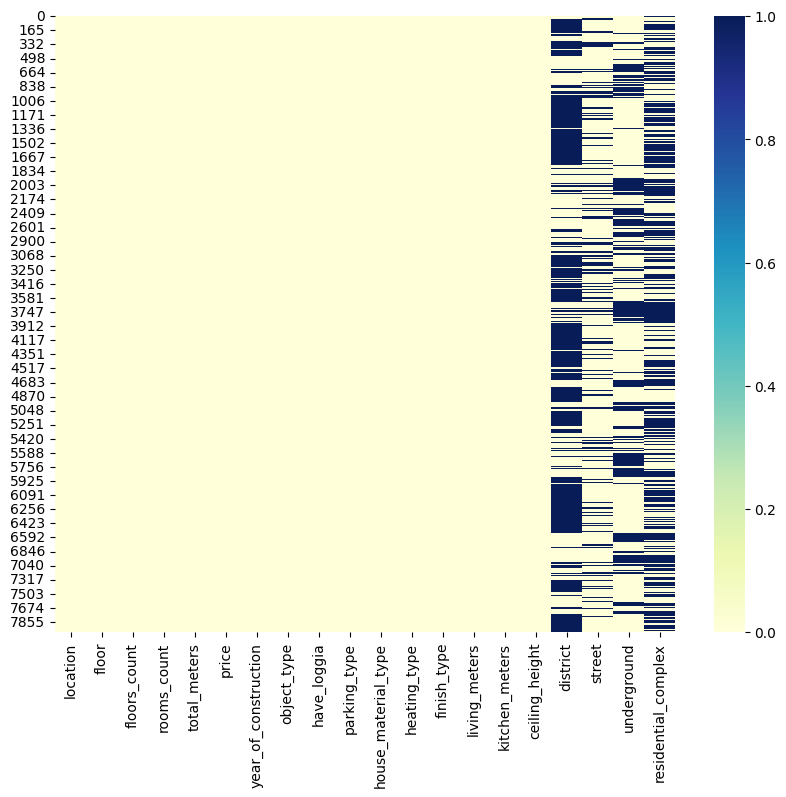

In [42]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [44]:
# "-1" меняем на NaN (нул. знач.)
df.replace('-1', np.nan, inplace=True)

df.head(10)

<ipython-input-44-bab6b10aec02>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace('-1', np.nan, inplace=True)


,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,house_material_type,heating_type,finish_type,living_meters,kitchen_meters,ceiling_height,district,street,underground,residential_complex
0,Москва,11,13,5,265.6,405328840,2024,Новостройка,NaN,NaN,Монолитный,NaN,Чистовая,NaN,NaN,3 м,Дорогомилово,NaN,Парк Победы,Виктори Парк Резиденсез ЖК
1,Москва,26,31,5,246.7,288063785,2008,Вторичка,3 балкона,Подземная,NaN,NaN,NaN,"140,9 м²",28 м²,"3,1 м",Очаково-Матвеевское,Нежинская,Давыдково,Кутузовская Ривьера
2,Москва,4,8,5,117.0,58500000,1939,Вторичка,1 балкон,Открытая,NaN,NaN,NaN,NaN,10 м²,"3,2 м",Пресненский,Большая Садовая,Маяковская,NaN
3,Москва,24,24,5,172.5,207000000,2024,Новостройка,NaN,NaN,Монолитно-кирпичный,NaN,Без отделки,"104,6 м²","10,5 м²","3,2 м",Филевский парк,Береговой проезд,Фили,Береговой-2
4,Москва,3,9,5,234.8,125000000,1999,Вторичка,"1 лоджия, 2 балкона",Подземная,NaN,NaN,NaN,140 м²,23 м²,NaN,Тверской,Краснопролетарская,Новослободская,Ласточкино гнездо
5,Москва,57,76,5,303.4,260000000,2008,Вторичка / Апартаменты,NaN,Подземная,NaN,NaN,NaN,NaN,NaN,"3,2 м",Пресненский,набережная Пресненская,Деловой центр,Город Столиц
6,Москва,5,5,5,85.0,19000000,NaN,Вторичка,2 балкона,Наземная,NaN,NaN,NaN,"58,4 м²","7,5 м²",NaN,Соколиная гора,Семеновский Вал,Семёновская,NaN
7,Москва,23,24,5,415.0,150000000,1998,Вторичка,2 лоджии,Подземная,NaN,NaN,NaN,300 м²,74 м²,"3,5 м",Щукино,Маршала Бирюзова,Октябрьское поле,Две башни
8,Москва,4,16,5,217.9,205915500,2026,Новостройка,1 лоджия,Подземная,Монолитный,NaN,"Без отделки, чистовая с мебелью","66,6 м²","56,4 м²","3,65 м",Раменки,Сергея Бондарчука,Мичуринский проспект,Река
9,Москва,17,17,5,148.0,120000000,2022,Вторичка,NaN,NaN,NaN,NaN,NaN,70 м²,27 м²,3 м,Даниловский,проспект Лихачева,Технопарк,Квартал на набережной NOW


In [46]:
# выводим кол-во нул. значений ещё раз
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Parametr', 'Null Count']

print(null_counts)

                Parametr  Null Count
0               location           1
1                  floor           1
2           floors_count           1
3            rooms_count          94
4           total_meters           1
5                  price          14
6   year_of_construction        1251
7            object_type           1
8            have_loggia        3066
9           parking_type        3177
10   house_material_type        5917
11          heating_type        7215
12           finish_type        5400
13         living_meters        1614
14        kitchen_meters        1209
15        ceiling_height        2534
16              district        4347
17                street        1499
18           underground        2204
19   residential_complex        3575


<Axes: >

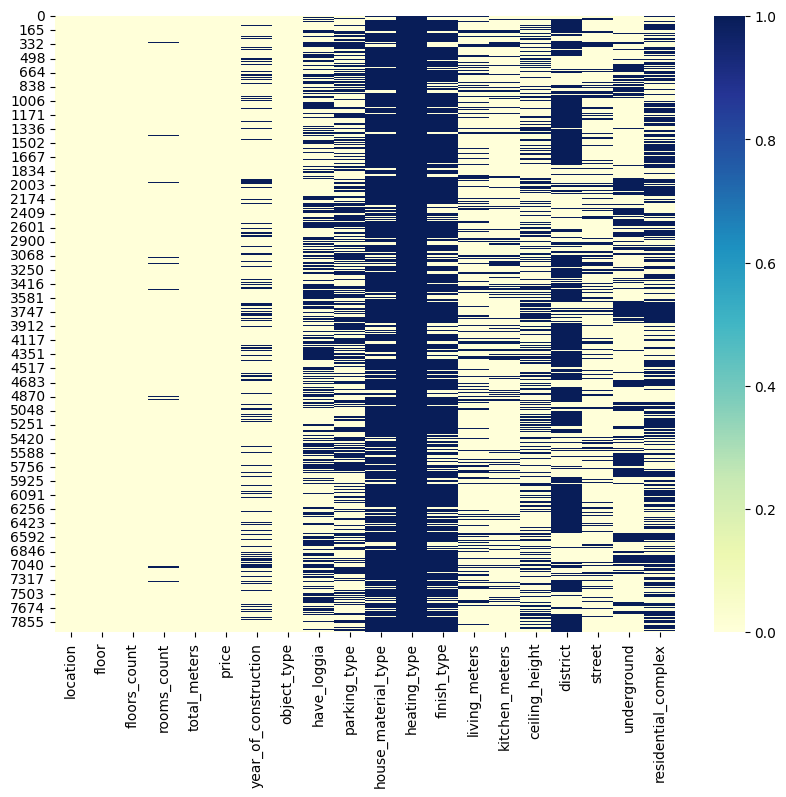

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [59]:
#Удаление колонок и строчек, в которых пропуски
#Удаление строчек
df = df.dropna(subset=['rooms_count'])
#Удаление столбцов
df.drop(['house_material_type', 'heating_type', 'finish_type', 'district', 'residential_complex'], axis=1,inplace=True)


KeyError: "['house_material_type', 'heating_type', 'finish_type', 'district', 'residential_complex'] not found in axis"

In [60]:
   print(df.columns.tolist())


['location', 'floor', 'floors_count', 'rooms_count', 'total_meters', 'price', 'year_of_construction', 'object_type', 'have_loggia', 'parking_type', 'living_meters', 'kitchen_meters', 'ceiling_height', 'street', 'underground']


<Axes: >

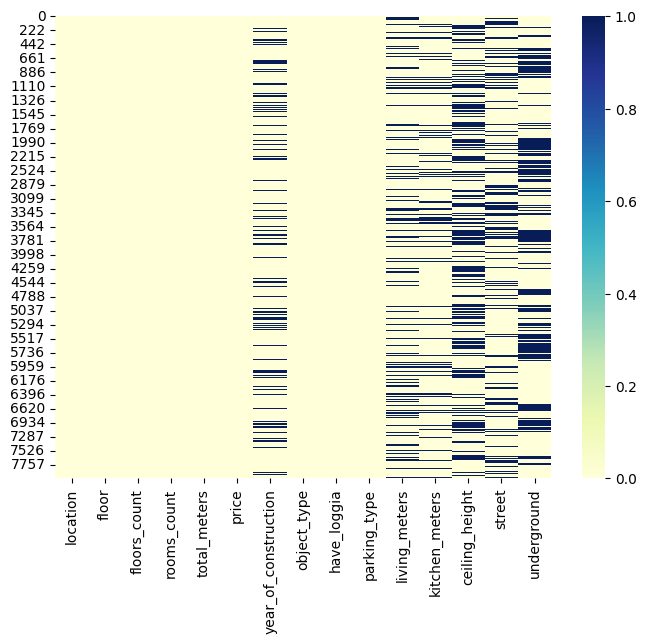

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [62]:
#Заменим пропуски нулями
df['have_loggia'] = df['have_loggia'].fillna('0')
df['parking_type'] = df['parking_type'].fillna('0')

<Axes: >

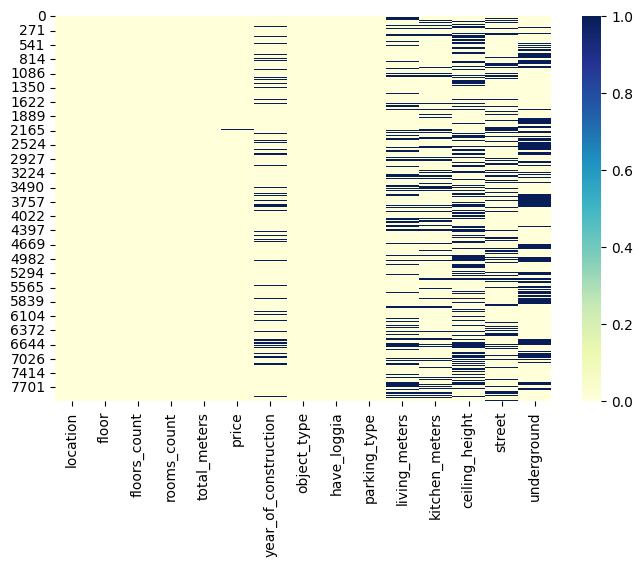

In [64]:
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [67]:
# выводим кол-во пропусков
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Parametr', 'Null Count']

print(null_counts)

                Parametr  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price          13
6   year_of_construction        1220
7            object_type           0
8            have_loggia           0
9           parking_type           0
10         living_meters        1584
11        kitchen_meters        1176
12        ceiling_height        2496
13                street        1482
14           underground        2185


Удаляем строки, где цена отсутствует

In [68]:
df.shape

(7122, 15)

In [69]:
df = df.dropna(subset=['price'])

In [70]:
df.shape

(7109, 15)

<Axes: >

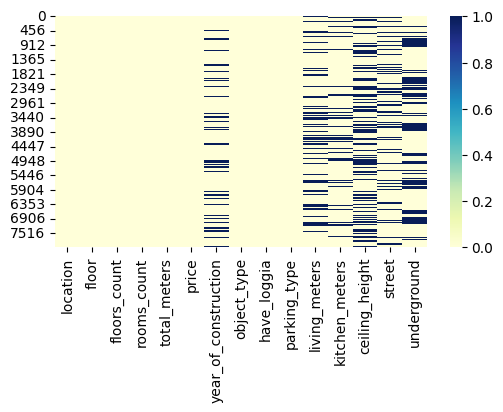

In [72]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7109 entries, 0 to 7977
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7109 non-null   object
 1   floor                 7109 non-null   object
 2   floors_count          7109 non-null   object
 3   rooms_count           7109 non-null   object
 4   total_meters          7109 non-null   object
 5   price                 7109 non-null   object
 6   year_of_construction  5889 non-null   object
 7   object_type           7109 non-null   object
 8   have_loggia           7109 non-null   object
 9   parking_type          7109 non-null   object
 10  living_meters         5526 non-null   object
 11  kitchen_meters        5943 non-null   object
 12  ceiling_height        4613 non-null   object
 13  street                5637 non-null   object
 14  underground           4924 non-null   object
dtypes: object(15)
memory usage: 888.6+ KB


**Меняем тип данных**



*   rooms_count




In [74]:
df['rooms_count'].unique()
#rooms_count нас такое значение не устраивает

array(['5', '1', '3', '2', '4', 'rooms_count'], dtype=object)

In [75]:
# Найдём эту строчку
df_rooms = df.loc[df['rooms_count'] == 'rooms_count']
df_rooms

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
2999,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground


In [77]:
# удаляем эту строчку
df.drop(2999, inplace=True)

<ipython-input-77-82c265dea6d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(2999, inplace=True)


In [79]:
# меняем тип данных
df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='raise')
df['rooms_count']

<ipython-input-79-59d3908e4586>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rooms_count'] = pd.to_numeric(df['rooms_count'], errors='raise')


,rooms_count
0,5
1,5
2,5
3,5
4,5
...,...
7973,2
7974,2
7975,2
7976,2




*   price



In [80]:
df['price'] = pd.to_numeric(df['price'], errors='raise')
# изменяем флот на инт
df['price'] = df['price'].astype(int)
df['price']

<ipython-input-80-8befa59c0d56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = pd.to_numeric(df['price'], errors='raise')
<ipython-input-80-8befa59c0d56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


,price
0,405328840
1,288063785
2,58500000
3,207000000
4,125000000
...,...
7973,7700000
7974,11850480
7975,9000000
7976,7900000





*  floor и floors_count


In [85]:
df['floor'] = pd.to_numeric(df['floor'], errors ='raise')
df['floor']


<ipython-input-85-d322ca8cd328>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floor'] = pd.to_numeric(df['floor'], errors ='raise')


,floor
0,11
1,26
2,4
3,24
4,3
...,...
7973,2
7974,2
7975,7
7976,4


In [86]:
df['floors_count'] = pd.to_numeric(df['floors_count'], errors ='raise')
df['floors_count']

<ipython-input-86-2fc007f8012f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['floors_count'] = pd.to_numeric(df['floors_count'], errors ='raise')


,floors_count
0,13
1,31
2,8
3,24
4,9
...,...
7973,5
7974,16
7975,17
7976,5




*   total_meters



In [87]:
df['total_meters'].unique()

array(['265.6', '246.7', '117.0', ..., '78.14', '79.38', '60.99'],
      dtype=object)

In [88]:
df['total_meters'] = pd.to_numeric(df['total_meters'], errors ='raise')
df['total_meters']

<ipython-input-88-81bec1e5c80c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_meters'] = pd.to_numeric(df['total_meters'], errors ='raise')


,total_meters
0,265.6
1,246.7
2,117.0
3,172.5
4,234.8
...,...
7973,43.5
7974,60.4
7975,41.0
7976,45.0




*   Высота потолков

In [91]:
df['ceiling_height'].unique()

array(['3\xa0м', '3,1\xa0м', '3,2\xa0м', nan, '3,5\xa0м', '3,65\xa0м',
       '4\xa0м', '3,52\xa0м', '3,6\xa0м', '3,24\xa0м', '2,82\xa0м',
       '3,08\xa0м', '2,62\xa0м', '2,7\xa0м', '2,66\xa0м', '2,63\xa0м',
       '2,72\xa0м', '2,8\xa0м', '2,74\xa0м', '3,04\xa0м', '2,75\xa0м',
       '2,5\xa0м', '1,8\xa0м', '2,9\xa0м', '3,74\xa0м', '2,85\xa0м',
       '2,6\xa0м', '2,64\xa0м', '2,65\xa0м', '2\xa0м', '2,52\xa0м',
       '2,68\xa0м', '2,69\xa0м', '3,75\xa0м', '2,78\xa0м', '3,05\xa0м',
       '2,54\xa0м', '3,3\xa0м', '3,25\xa0м', '3,15\xa0м', '3,12\xa0м',
       '2,95\xa0м', '2,56\xa0м', '2,76\xa0м', '3,45\xa0м', '2,77\xa0м',
       '2,88\xa0м', '3,4\xa0м', '2,55\xa0м', '2,4\xa0м', '2,84\xa0м',
       '2,53\xa0м', '2,48\xa0м', '2,87\xa0м', '2,83\xa0м', '4,4\xa0м',
       '2,58\xa0м', '2,57\xa0м', '2,73\xa0м', '52\xa0м', '2,26\xa0м',
       '2,3\xa0м', '1,65\xa0м', '3,02\xa0м', '3,17\xa0м', '4,5\xa0м',
       '2,98\xa0м', '3,72\xa0м', '2,97\xa0м', '2,99\xa0м', '3,35\xa0м',
       '3,27\x

In [92]:
df['ceiling_height'] = df['ceiling_height'].str.replace(r'\xa0м', '', regex=True).str.replace(',', '.')
df['ceiling_height'] = df['ceiling_height'].astype(float)
df['ceiling_height']

<ipython-input-92-0689f79de48e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ceiling_height'] = df['ceiling_height'].str.replace(r'\xa0м', '', regex=True).str.replace(',', '.')
<ipython-input-92-0689f79de48e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ceiling_height'] = df['ceiling_height'].astype(float)


,ceiling_height
0,3.00
1,3.10
2,3.20
3,3.20
4,NaN
...,...
7973,2.77
7974,2.72
7975,2.80
7976,NaN


<Axes: >

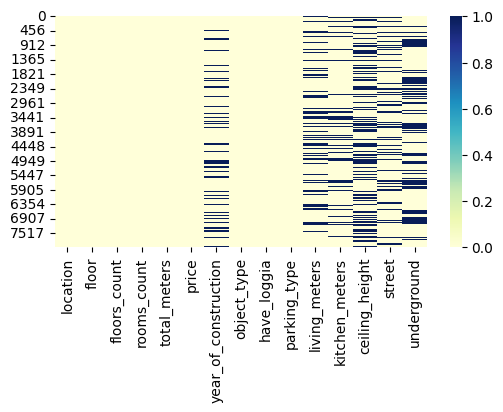

In [94]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [95]:
df['ceiling_height'].describe()

,ceiling_height
count,4612.000000
mean,2.828591
std,0.849889
min,0.000000
25%,2.700000
50%,2.750000
75%,2.900000
max,52.000000


<Axes: xlabel='price', ylabel='ceiling_height'>

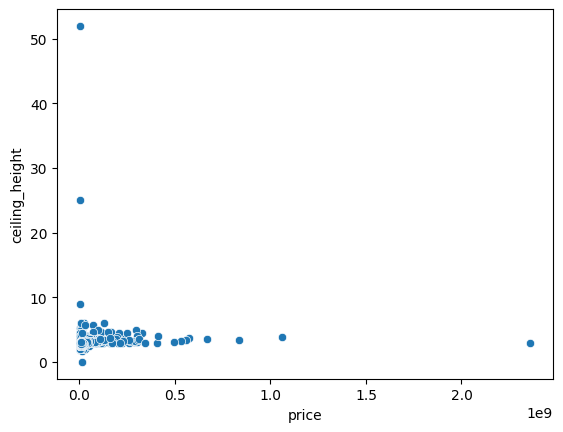

In [103]:
sns.scatterplot(x='price', y='ceiling_height', data=df)

In [107]:
# выводим два макс. значения
df.loc[df['ceiling_height'].nlargest(3).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1100,Балашиха,1,2,2,58.3,5700000,1955,Вторичка,0,0,40 м²,6 м²,52.0,Маршала Говорова,Железнодорожная
3776,Клин,5,5,1,31.9,3850000,1995,Вторичка,1 балкон,Наземная,"17,7 м²","5,3 м²",25.0,Лесная,NaN
3948,Щёлково,1,9,2,49.0,5449000,1990,Вторичка,1 балкон,Наземная,27 м²,9 м²,9.0,Комсомольская,Щёлковская


In [106]:
# выводим мин. значения
df.loc[df['ceiling_height'].nsmallest(2).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
2606,Котельники,2,5,2,47.59,12611350,2027,Новостройка,0,0,"22,2 м²","12,7 м²",0.00,Комсомольская,NaN
1500,Балашиха,13,15,3,73.60,11300000,1999,Вторичка,3 лоджии,Наземная,"40,7 м²","8,4 м²",1.65,Октябрьская,Железнодорожная


In [108]:
df.drop(2606, inplace=True)
df.drop(1100, inplace=True)
df.drop(3776, inplace=True)

In [109]:
df['ceiling_height'].describe()

,ceiling_height
count,4609.000000
mean,2.813725
std,0.299073
min,1.650000
25%,2.700000
50%,2.750000
75%,2.900000
max,9.000000


In [110]:
# Заполняем пропуски пустыми значениями
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].mean()).round(2)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Москва,11,13,5,265.6,405328840,2024,Новостройка,0,0,NaN,NaN,3.00,NaN,Парк Победы
1,Москва,26,31,5,246.7,288063785,2008,Вторичка,3 балкона,Подземная,"140,9 м²",28 м²,3.10,Нежинская,Давыдково
2,Москва,4,8,5,117.0,58500000,1939,Вторичка,1 балкон,Открытая,NaN,10 м²,3.20,Большая Садовая,Маяковская
3,Москва,24,24,5,172.5,207000000,2024,Новостройка,0,0,"104,6 м²","10,5 м²",3.20,Береговой проезд,Фили
4,Москва,3,9,5,234.8,125000000,1999,Вторичка,"1 лоджия, 2 балкона",Подземная,140 м²,23 м²,2.81,Краснопролетарская,Новослободская
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,Химки,2,5,2,43.5,7700000,1962,Вторичка,1 балкон,Наземная,"28,4 м²",6 м²,2.77,Первомайская,Химки
7974,Химки,2,16,2,60.4,11850480,2026,Новостройка,1 балкон,Подземная,24 м²,"13,6 м²",2.72,NaN,Хлебниково
7975,Химки,7,17,2,41.0,9000000,2016,Вторичка,1 лоджия,Подземная,24 м²,6 м²,2.80,Германа Титова,Химки
7976,Химки,4,5,2,45.0,7900000,NaN,Вторичка,1 балкон,Наземная,30 м²,6 м²,2.81,Ватутина,Химки


<Axes: >

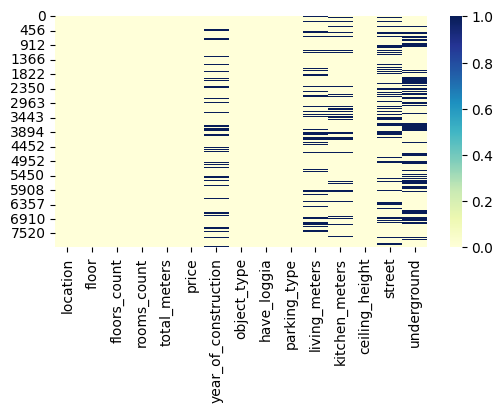

In [111]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cmap='YlGnBu')




*   object_type



In [113]:
print(f'Уникальные значения: {df["object_type"].unique()}')

Уникальные значения: ['Новостройка' 'Вторичка' 'Вторичка / Апартаменты'
 'Новостройка / Пентхаус' 'Новостройка / Апартаменты'
 'Вторичка / Пентхаус']


In [117]:
# Оставляем значения вторичка и нвостройка и переводим их в 1 и 0
def values(value):
  if value == 'Вторичка / Апартаменты':
    return 'Вторичка'
  elif value == 'Вторичка / Пентхаус':
    return 'Вторичка'
  elif value == 'Новостройка / Пентхаус':
    return 'Новостройка'
  elif value == 'Новостройка / Апартаменты':
    return 'Новостройка'
  else:
    return value

df['object_type'] = df['object_type'].apply(values)

df['object_type'] = df['object_type'].map(dict(Вторичка = 1, Новостройка = 0))
df['object_type']


,object_type
0,0
1,1
2,1
3,0
4,1
...,...
7973,1
7974,0
7975,1
7976,1




*   год


In [118]:
df['year_of_construction'].unique()

array(['2024', '2008', '1939', '1999', nan, '1998', '2026', '2022',
       '2028', '2010', '2002', '2023', '2027', '1976', '2025', '2013',
       '1987', '2021', '2019', '2015', '1980', '2006', '2016', '2014',
       '1993', '1990', '2020', '2011', '1983', '1984', '1961', '1968',
       '2018', '1994', '1979', '2017', '2009', '1977', '1966', '1988',
       '2012', '1974', '1965', '2007', '1985', 'Напишите автору', '1962',
       '1972', '1970', '1996', '1959', '1986', '1982', '1929', '1975',
       '1967', '1930', '1971', '2005', '2000', '1963', '1969', '1952',
       '1997', '1978', '1964', '2003', '1954', '2001', '1958', '1960',
       '1902', '1897', '1992', '1917', '2004', '1989', '1957', '1900',
       '1973', '1981', '1991', '1995', 'Позвоните автору', '1955', '1949',
       '1947', '1953', '1910', '1901', '1909', '1600', '1951', '1940',
       '1938', '1956', '1948', '1936', '1931', '1950', '1934', '1928',
       '1945', '1937', '1927', '1896', '1777', '2031', '1935', 'Аукцион',

In [120]:
#удаляем не верные данные
values_to_filter = ['Напишите автору', 'Позвоните автору', 'Аукцион']
tupp = df['year_of_construction'].isin(values_to_filter)

df = df[~tupp]

df['year_of_construction'].unique()

array(['2024', '2008', '1939', '1999', nan, '1998', '2026', '2022',
       '2028', '2010', '2002', '2023', '2027', '1976', '2025', '2013',
       '1987', '2021', '2019', '2015', '1980', '2006', '2016', '2014',
       '1993', '1990', '2020', '2011', '1983', '1984', '1961', '1968',
       '2018', '1994', '1979', '2017', '2009', '1977', '1966', '1988',
       '2012', '1974', '1965', '2007', '1985', '1962', '1972', '1970',
       '1996', '1959', '1986', '1982', '1929', '1975', '1967', '1930',
       '1971', '2005', '2000', '1963', '1969', '1952', '1997', '1978',
       '1964', '2003', '1954', '2001', '1958', '1960', '1902', '1897',
       '1992', '1917', '2004', '1989', '1957', '1900', '1973', '1981',
       '1991', '1995', '1955', '1949', '1947', '1953', '1910', '1901',
       '1909', '1600', '1951', '1940', '1938', '1956', '1948', '1936',
       '1931', '1950', '1934', '1928', '1945', '1937', '1927', '1896',
       '1777', '2031', '1935', '1941', '1932', '1926', '1943', '1904',
       '1

In [122]:
# Кол-во пропусков
df["year_of_construction"].isna().sum()

1220

In [143]:
df['year_of_construction'].describe()

,year_of_construction
count,4238.000000
mean,2003.352525
std,24.502418
min,1600.000000
25%,1984.000000
50%,2014.000000
75%,2023.000000
max,2028.000000


In [124]:
# переводим хначения в нужный тип
df['year_of_construction'] = pd.to_numeric(df['year_of_construction'], errors ='raise')
df['year_of_construction']

,year_of_construction
0,2024.0
1,2008.0
2,1939.0
3,2024.0
4,1999.0
...,...
7973,1962.0
7974,2026.0
7975,2016.0
7976,NaN


<Axes: xlabel='price', ylabel='year_of_construction'>

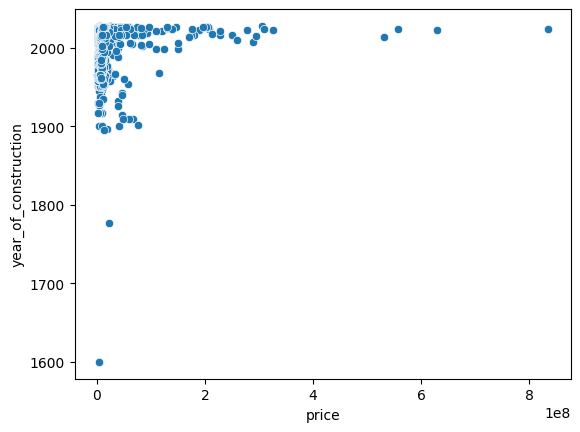

In [155]:
sns.scatterplot(x='price', y='year_of_construction', data=df)

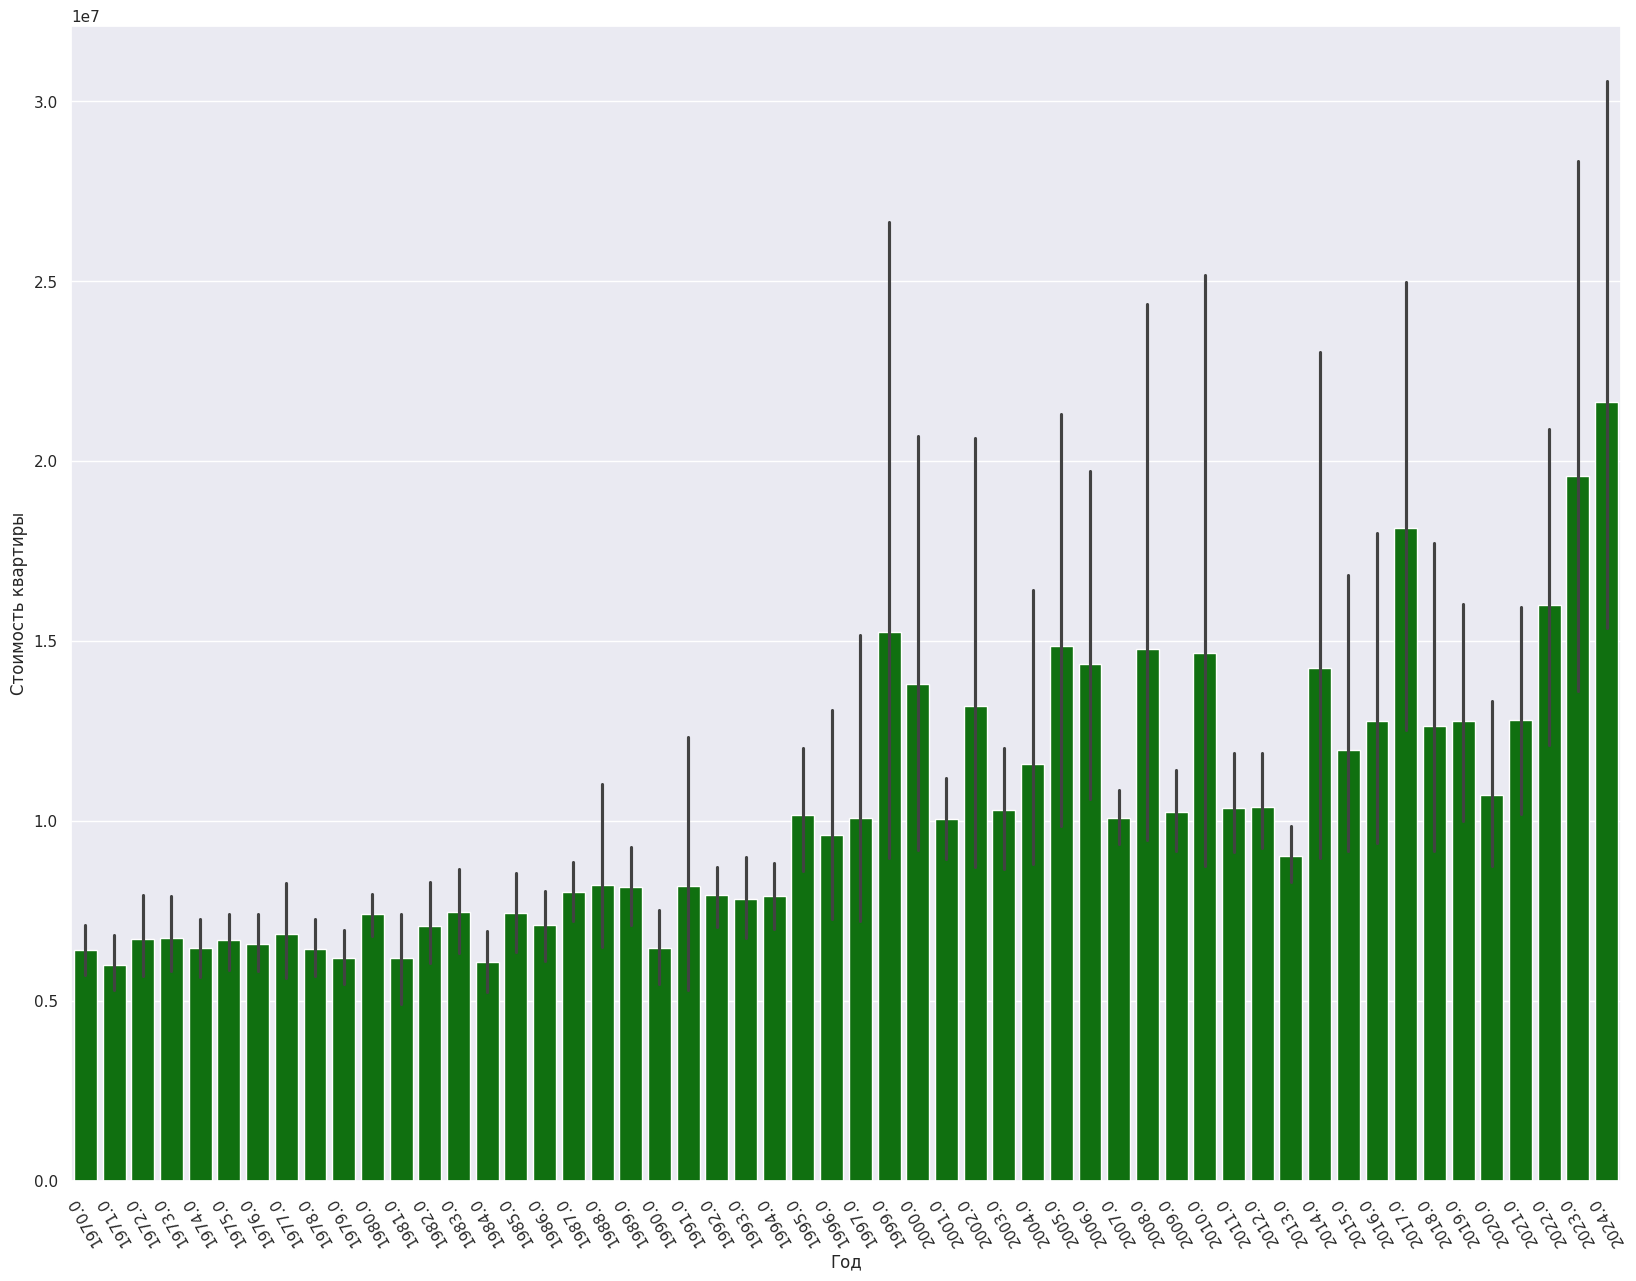

In [163]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x='year_of_construction', y='price', data=df, color = 'green')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

In [157]:
df = df[(df['year_of_construction'] >= 1970) & (df['year_of_construction'] <= 2024)]

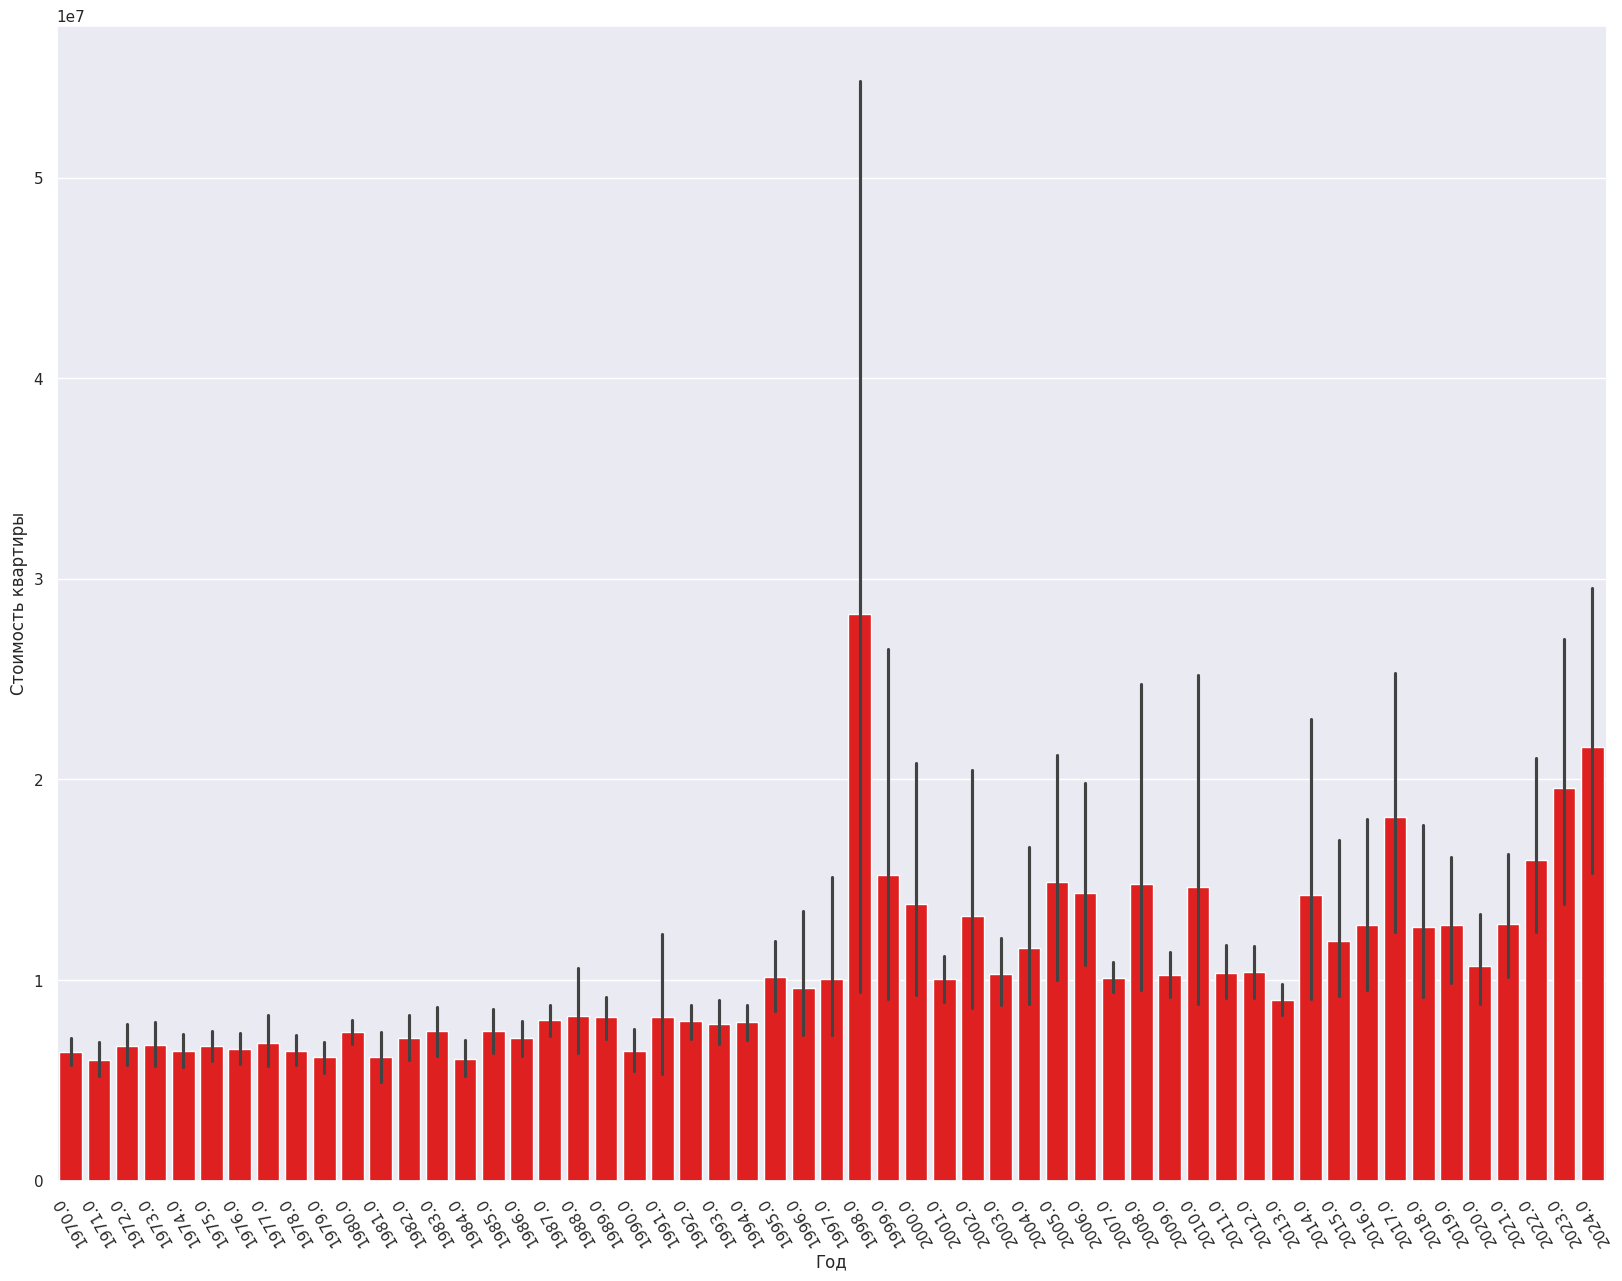

In [159]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x='year_of_construction', y='price', data=df, color = 'red')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

In [160]:
df = df[df['year_of_construction'] != 1998]

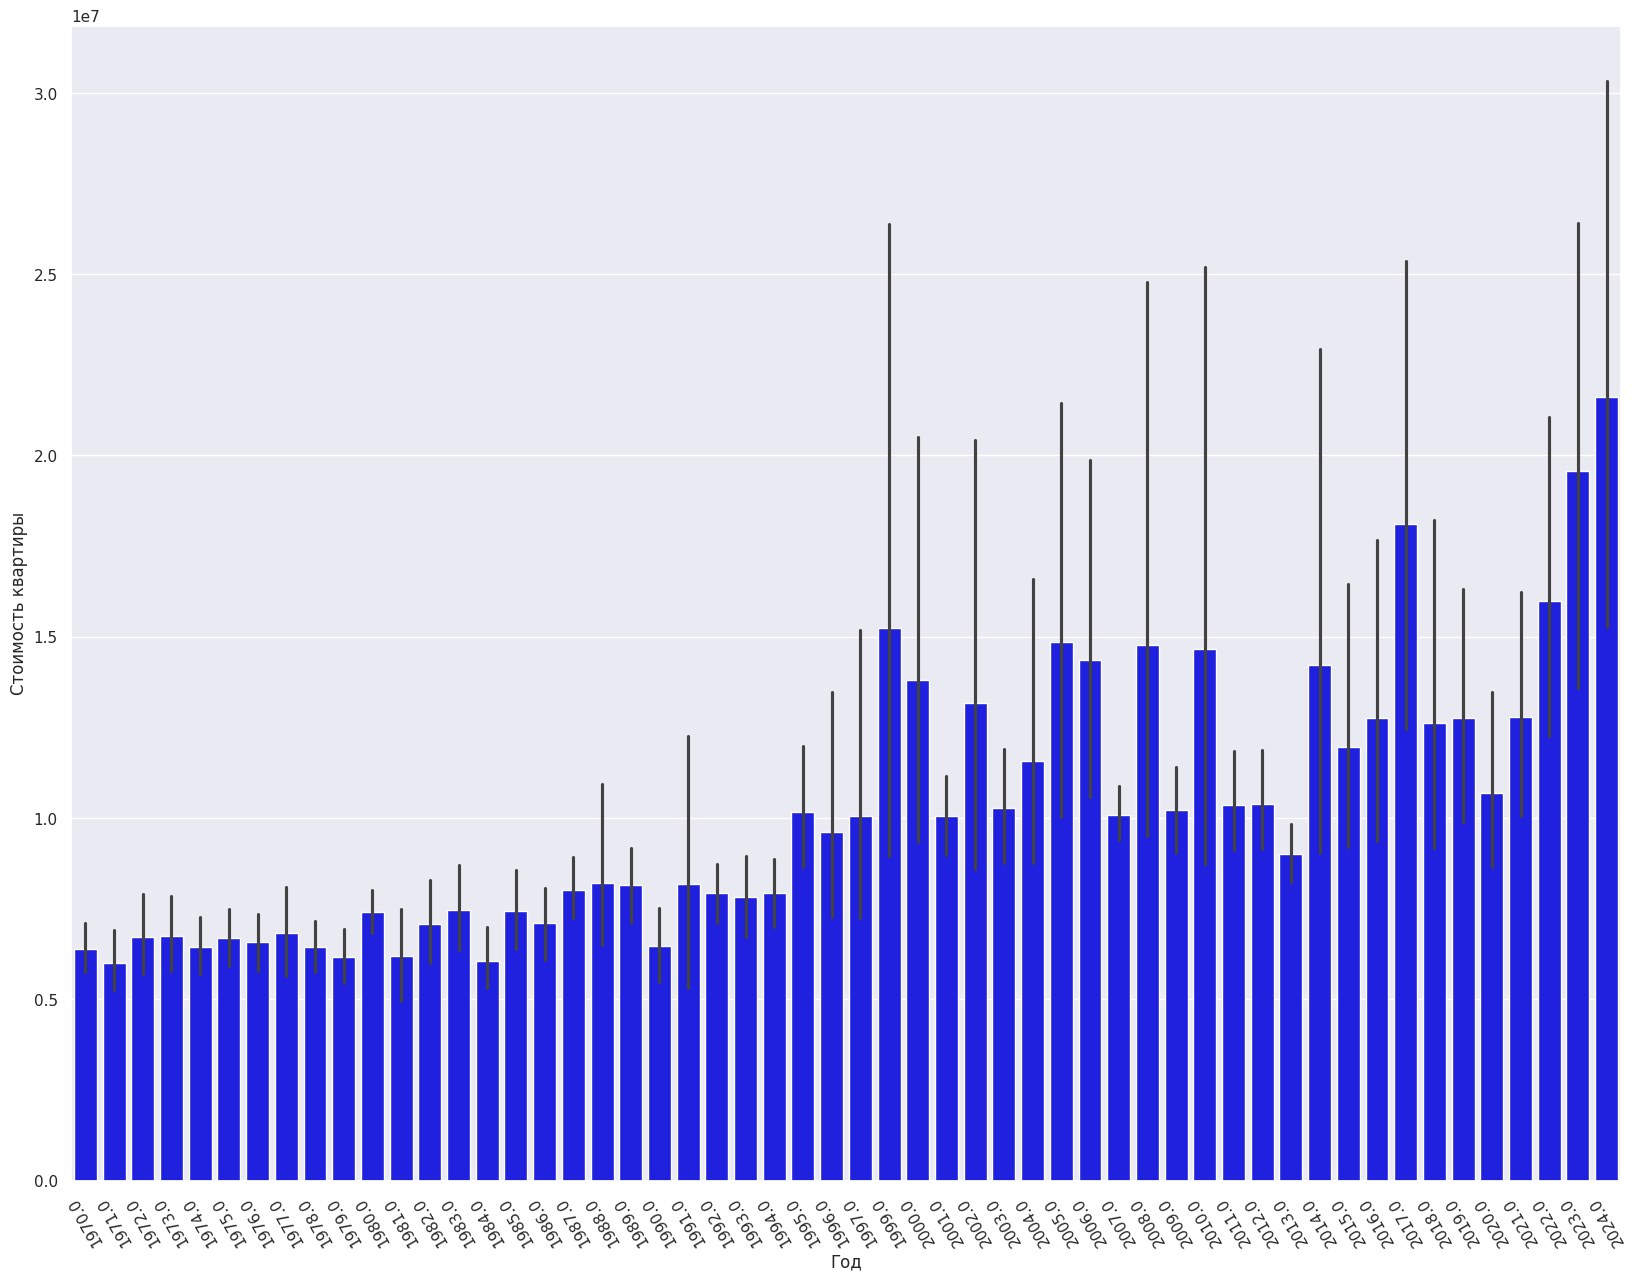

In [161]:
sns.set(style="darkgrid")
plt.figure(figsize=(20, 15))
sns.barplot(x='year_of_construction', y='price', data=df, color = 'blue')
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры')
plt.xticks(rotation=120)

plt.show()

In [164]:
df['year_of_construction'].describe()

,year_of_construction
count,3023.000000
mean,2005.993715
std,17.261669
min,1970.000000
25%,1991.000000
50%,2013.000000
75%,2020.000000
max,2024.000000


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3023 entries, 1 to 7975
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              3023 non-null   int64  
 1   floor                 3023 non-null   int64  
 2   floors_count          3023 non-null   int64  
 3   rooms_count           3023 non-null   int64  
 4   total_meters          3023 non-null   float64
 5   price                 3023 non-null   int64  
 6   year_of_construction  3023 non-null   float64
 7   object_type           3023 non-null   int64  
 8   have_loggia           3023 non-null   int64  
 9   parking_type          3023 non-null   int64  
 10  living_meters         3023 non-null   float64
 11  kitchen_meters        3023 non-null   float64
 12  ceiling_height        3023 non-null   float64
 13  street                3023 non-null   int64  
 14  underground           3023 non-null   int64  
dtypes: float64(5), int64(10)
m



*   Пл. кухни
*   Жилая пл.





In [127]:
# уник. знач. kitchen_meters
df['kitchen_meters'].unique()

array([nan, '28\xa0м²', '10\xa0м²', '10,5\xa0м²', '23\xa0м²', '7,5\xa0м²',
       '74\xa0м²', '56,4\xa0м²', '27\xa0м²', '18,4\xa0м²', '11\xa0м²',
       '53,7\xa0м²', '20\xa0м²', '35,4\xa0м²', '8,7\xa0м²', '16,4\xa0м²',
       '50\xa0м²', '1\xa0м²', '6,1\xa0м²', '3\xa0м²', '11,5\xa0м²',
       '3,7\xa0м²', '5,1\xa0м²', '5,8\xa0м²', '5,5\xa0м²', '14\xa0м²',
       '20,1\xa0м²', '12,2\xa0м²', '7\xa0м²', '11,8\xa0м²', '8,3\xa0м²',
       '23,6\xa0м²', '11,4\xa0м²', '9\xa0м²', '17,2\xa0м²', '16,2\xa0м²',
       '10,4\xa0м²', '12\xa0м²', '6,5\xa0м²', '20,3\xa0м²', '7,3\xa0м²',
       '9,6\xa0м²', '8\xa0м²', '22,2\xa0м²', '22,9\xa0м²', '13,3\xa0м²',
       '8,5\xa0м²', '8,4\xa0м²', '11,6\xa0м²', '4,5\xa0м²', '18,1\xa0м²',
       '5,3\xa0м²', '6\xa0м²', '9,1\xa0м²', '18,2\xa0м²', '5\xa0м²',
       '13,6\xa0м²', '4\xa0м²', '21,5\xa0м²', '11,9\xa0м²', '9,5\xa0м²',
       '15,9\xa0м²', '8,2\xa0м²', '12,8\xa0м²', '9,7\xa0м²', '18,3\xa0м²',
       '21,3\xa0м²', '17,7\xa0м²', '9,3\xa0м²', '13,2\xa0

In [128]:
# уник. знач. living_meters
df['living_meters'].unique()

array([nan, '140,9\xa0м²', '104,6\xa0м²', '140\xa0м²', '58,4\xa0м²',
       '300\xa0м²', '66,6\xa0м²', '70\xa0м²', '97,5\xa0м²', '110,9\xa0м²',
       '85,3\xa0м²', '71,8\xa0м²', '127\xa0м²', '19,5\xa0м²', '9,5\xa0м²',
       '12\xa0м²', '10,9\xa0м²', '11,6\xa0м²', '14,1\xa0м²', '9,7\xa0м²',
       '10,6\xa0м²', '8,8\xa0м²', '11\xa0м²', '13,2\xa0м²', '13,5\xa0м²',
       '10,1\xa0м²', '18\xa0м²', '11,7\xa0м²', '17,9\xa0м²', '11,8\xa0м²',
       '17\xa0м²', '15,2\xa0м²', '12,7\xa0м²', '11,3\xa0м²', '16,6\xa0м²',
       '12,3\xa0м²', '20,8\xa0м²', '14,6\xa0м²', '24\xa0м²', '15\xa0м²',
       '12,9\xa0м²', '16,9\xa0м²', '20\xa0м²', '19\xa0м²', '10,2\xa0м²',
       '16,7\xa0м²', '18,6\xa0м²', '19,4\xa0м²', '16,2\xa0м²', '16\xa0м²',
       '30\xa0м²', '10\xa0м²', '13,8\xa0м²', '16,5\xa0м²', '12,2\xa0м²',
       '9,4\xa0м²', '18,9\xa0м²', '13\xa0м²', '18,8\xa0м²', '37,1\xa0м²',
       '48\xa0м²', '45\xa0м²', '36\xa0м²', '44,9\xa0м²', '38\xa0м²',
       '27,8\xa0м²', '28\xa0м²', '37,4\xa0м²',

In [129]:
df['living_meters'] = df['living_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
df['living_meters'] = df['living_meters'].astype(float)
df['living_meters']

,living_meters
0,NaN
1,140.9
2,NaN
3,104.6
4,140.0
...,...
7973,28.4
7974,24.0
7975,24.0
7976,30.0


In [130]:
df['kitchen_meters'] = df['kitchen_meters'].str.replace(r'\xa0м²', '', regex=True).str.replace(',', '.')
df['kitchen_meters'] = df['kitchen_meters'].astype(float)
df['kitchen_meters']

,kitchen_meters
0,NaN
1,28.0
2,10.0
3,10.5
4,23.0
...,...
7973,6.0
7974,13.6
7975,6.0
7976,6.0


In [131]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Parametr', 'Null Count']

print(null_counts)

                Parametr  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price           0
6   year_of_construction        1220
7            object_type           0
8            have_loggia           0
9           parking_type           0
10         living_meters        1576
11        kitchen_meters        1165
12        ceiling_height           0
13                street        1470
14           underground        2161


In [132]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Москва,11,13,5,265.6,405328840,2024.0,0,0,0,NaN,NaN,3.00,NaN,Парк Победы
1,Москва,26,31,5,246.7,288063785,2008.0,1,3 балкона,Подземная,140.9,28.0,3.10,Нежинская,Давыдково
2,Москва,4,8,5,117.0,58500000,1939.0,1,1 балкон,Открытая,NaN,10.0,3.20,Большая Садовая,Маяковская
3,Москва,24,24,5,172.5,207000000,2024.0,0,0,0,104.6,10.5,3.20,Береговой проезд,Фили
4,Москва,3,9,5,234.8,125000000,1999.0,1,"1 лоджия, 2 балкона",Подземная,140.0,23.0,2.81,Краснопролетарская,Новослободская
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7973,Химки,2,5,2,43.5,7700000,1962.0,1,1 балкон,Наземная,28.4,6.0,2.77,Первомайская,Химки
7974,Химки,2,16,2,60.4,11850480,2026.0,0,1 балкон,Подземная,24.0,13.6,2.72,NaN,Хлебниково
7975,Химки,7,17,2,41.0,9000000,2016.0,1,1 лоджия,Подземная,24.0,6.0,2.80,Германа Титова,Химки
7976,Химки,4,5,2,45.0,7900000,NaN,1,1 балкон,Наземная,30.0,6.0,2.81,Ватутина,Химки


In [135]:
# кодируем
from sklearn import preprocessing

columns = ['have_loggia', 'street', 'underground', 'parking_type',
           'location']

for col in columns:
  le = preprocessing.LabelEncoder()
  df[col] = le.fit_transform(df[col])
  integer_mapping = {l: i for i, l in enumerate(le.classes_)}

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7055 entries, 0 to 7977
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              7055 non-null   int64  
 1   floor                 7055 non-null   int64  
 2   floors_count          7055 non-null   int64  
 3   rooms_count           7055 non-null   int64  
 4   total_meters          7055 non-null   float64
 5   price                 7055 non-null   int64  
 6   year_of_construction  5835 non-null   float64
 7   object_type           7055 non-null   int64  
 8   have_loggia           7055 non-null   int64  
 9   parking_type          7055 non-null   int64  
 10  living_meters         5479 non-null   float64
 11  kitchen_meters        5890 non-null   float64
 12  ceiling_height        7055 non-null   float64
 13  street                7055 non-null   int64  
 14  underground           7055 non-null   int64  
dtypes: float64(5), int64(10)
m

<Axes: >

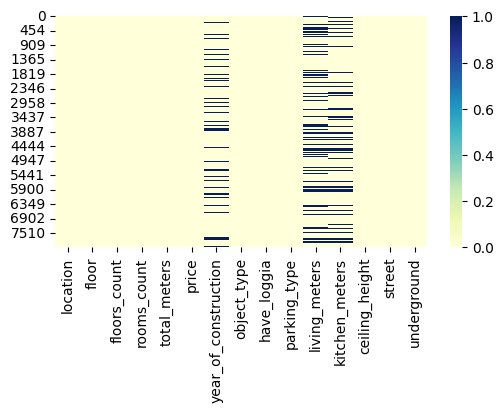

In [137]:
plt.figure(figsize=(6, 3))
sns.heatmap(df.isnull(), cmap='YlGnBu')

In [138]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']

print(null_counts)

                  Column  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price           0
6   year_of_construction        1220
7            object_type           0
8            have_loggia           0
9           parking_type           0
10         living_meters        1576
11        kitchen_meters        1165
12        ceiling_height           0
13                street           0
14           underground           0


In [139]:
# удаляем строчки, в которых указано нулевое значение в обеих колонках
df.dropna(subset=['kitchen_meters', 'living_meters'], inplace=True)
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1,19,26,31,5,246.7,288063785,2008.0,1,9,4,140.9,28.0,3.10,1015,63
3,19,24,24,5,172.5,207000000,2024.0,0,0,0,104.6,10.5,3.20,794,293
4,19,3,9,5,234.8,125000000,1999.0,1,4,4,140.0,23.0,2.81,945,172
6,19,5,5,5,85.0,19000000,NaN,1,5,2,58.4,7.5,2.81,582,246
7,19,23,24,5,415.0,150000000,1998.0,1,6,4,300.0,74.0,3.50,401,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7971,31,2,7,3,69.5,13635900,2026.0,0,1,4,29.9,9.3,2.72,1418,299
7973,31,2,5,2,43.5,7700000,1962.0,1,1,2,28.4,6.0,2.77,1066,298
7974,31,2,16,2,60.4,11850480,2026.0,0,1,4,24.0,13.6,2.72,1418,299
7975,31,7,17,2,41.0,9000000,2016.0,1,2,4,24.0,6.0,2.80,177,298


In [166]:
null_counts = df.isnull().sum().reset_index()
null_counts.columns = ['Column', 'Null Count']

print(null_counts)

                  Column  Null Count
0               location           0
1                  floor           0
2           floors_count           0
3            rooms_count           0
4           total_meters           0
5                  price           0
6   year_of_construction           0
7            object_type           0
8            have_loggia           0
9           parking_type           0
10         living_meters           0
11        kitchen_meters           0
12        ceiling_height           0
13                street           0
14           underground           0


In [167]:
df.loc[df['total_meters'].nlargest(20).index]

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1936,6,3,5,2,475.00,4799000,1977.0,1,1,2,33.0,7.0,2.81,1418,324
6943,37,3,5,2,475.00,4799000,1977.0,1,1,2,33.0,7.0,2.81,1418,324
4495,19,21,21,5,363.30,629417250,2023.0,0,0,4,190.3,31.4,2.81,749,283
4506,19,6,6,5,310.15,325657500,2023.0,1,0,4,196.9,22.7,4.55,904,191
4511,19,57,75,5,304.00,260000000,2010.0,1,0,0,140.0,90.0,3.00,1304,65
4496,19,11,12,5,303.00,531661349,2014.0,1,1,4,117.0,24.0,3.20,1178,297
4518,19,60,75,5,294.70,294700000,2015.0,1,0,4,191.0,46.0,5.00,1304,65
1837,19,82,85,4,285.00,251000000,2016.0,1,0,4,175.8,15.4,4.50,731,65
1495,0,1,2,3,276.90,29999999,1991.0,1,0,0,62.0,30.7,2.95,681,122
1847,19,25,26,4,250.00,64849000,2005.0,1,2,4,100.0,50.0,3.00,330,319


In [168]:
df.drop(1936, inplace=True)
df.drop(6943, inplace=True)


Кол-во комнат

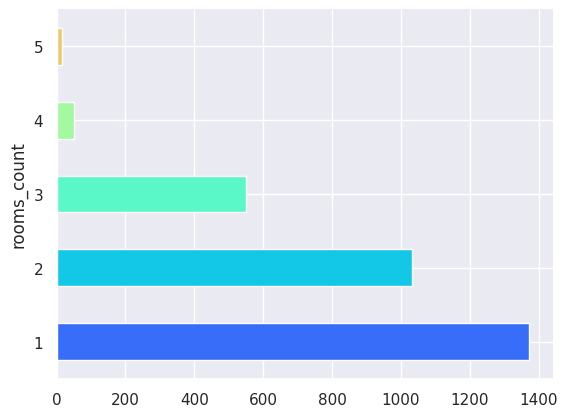

In [171]:
df.groupby('rooms_count').size().plot(kind='barh', color=sns.palettes.mpl_palette('rainbow'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Вторичка и новостройка

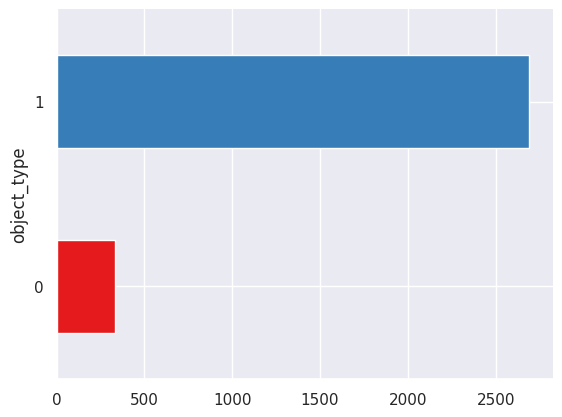

In [176]:
df.groupby('object_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Set1'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Цена за кв.м

In [182]:
df = df.assign(price_square_meter = df['price'] // df['total_meters'])

In [183]:
df

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_square_meter
1,19,26,31,5,246.7,288063785,2008.0,1,9,4,140.9,28.0,3.10,1015,63,1167668.0
3,19,24,24,5,172.5,207000000,2024.0,0,0,0,104.6,10.5,3.20,794,293,1200000.0
4,19,3,9,5,234.8,125000000,1999.0,1,4,4,140.0,23.0,2.81,945,172,532367.0
9,19,17,17,5,148.0,120000000,2022.0,1,0,0,70.0,27.0,3.00,1383,271,810810.0
18,19,21,25,5,151.0,48320000,2022.0,1,0,4,85.3,35.4,2.81,842,274,320000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,31,26,29,4,160.0,40900000,2017.0,1,7,4,100.0,20.0,3.10,344,298,255625.0
7966,31,7,9,2,45.5,7600000,2015.0,1,2,2,26.7,10.1,2.75,177,298,167032.0
7968,31,16,26,2,65.0,17000000,2017.0,1,2,2,50.0,10.0,2.70,549,23,261538.0
7970,31,13,17,2,56.0,9200000,2003.0,1,2,2,33.5,9.2,2.75,836,266,164285.0


Text(0.5, 1.0, 'Матрица корреляции')

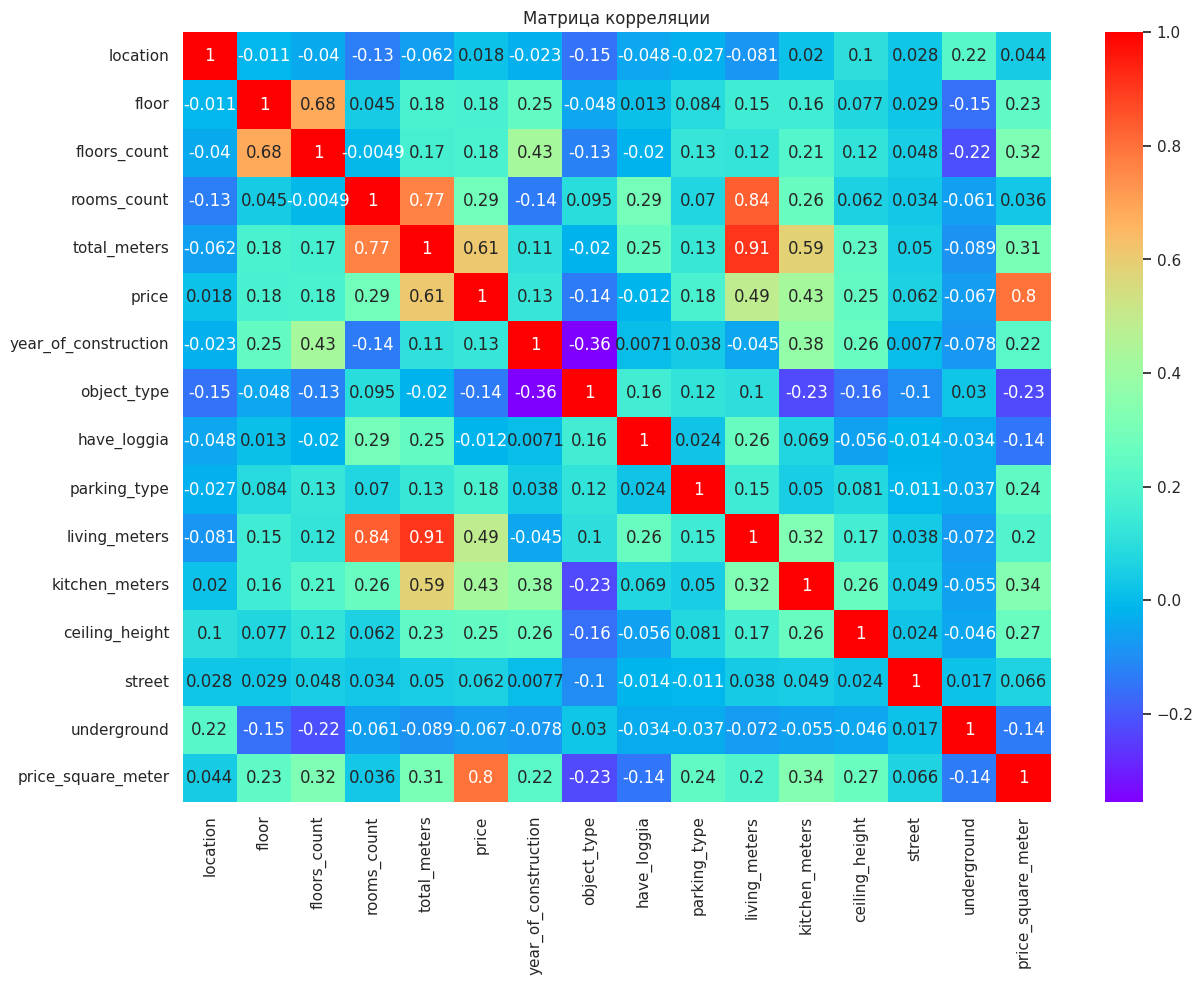

In [187]:
plt.figure(figsize = (14,10))
sns.heatmap(df.corr(), cmap = 'rainbow', annot = True)
plt.title('Матрица корреляции')

Вывод по матрице корреляции:

Стоимость квартиры зависит от количества комнат, общей площади квартиры, площади кухни и жилой площади, высоты потолка и от стоимости за квадратный метр.
Стоимость за квадратный метр зависит от цены, площади (общая площадь, площадь кухни и жилая), года постройки здания (больше чем общая стоимость квартиры), парковки, высоты потолка

Стоимость квартиры и стоимость за квадратный метр зависят друг от друга

